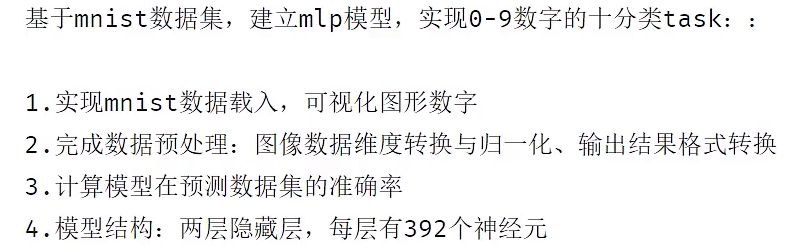

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
print(type(x_train),x_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


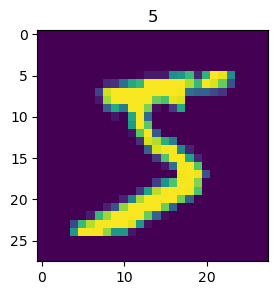

In [5]:
#visualize the data
img1 = x_train[0]
from matplotlib import pyplot as plt 
fig0 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [8]:
#format the input data 规范输入的数据，也就是把数据拉长成一行
x_train_format = x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])
x_test_format = x_test.reshape(x_test.shape[0],x_test.shape[1] * x_test.shape[2])
print(x_train_format.shape)

(60000, 784)


In [9]:
x_train_normal = x_train_format/255
x_test_normal = x_test_format/255
#归一化

In [13]:
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format)
#使用了 Keras 库中的 to_categorical() 函数，将标签 y_train 和 y_test 转换为 one-hot 编码形式。

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation
mlp = Sequential()
mlp.add(Dense(units=392,activation='sigmoid',input_dim=x_train.shape[1] * x_train.shape[2]))
mlp.add(Dense(units=392,activation='sigmoid'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
#configure the model 配置模型
mlp.compile(loss='categorical_crossentropy',optimizer='adam')
mlp.fit(x_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3411
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1428
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0911
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0641
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0465
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0346
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0265
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0206
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0166
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0140


In [17]:
#evaluate the model
import numpy as np
y_train_predict = mlp.predict(x_train_normal)
y_train_predict = np.argmax(y_train_predict,axis=-1)
print(y_train_predict)

1875/1875 [==============================] - 3s 2ms/step
[5 0 4 ... 5 6 8]


这里要注意的是新版本的顺序模型没有predict_classes了，所以对于多输出的结果，也就是输出层是softmax的用y_train_predict = np.argmax(y_train_predict,axis=-1) 解决
对于是sigmoid输出层的也就是只输出一个结果的用Y_pred = np.int64(Y_pred>0.5) 解决

In [18]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train_predict,y_train)
print(accuracy_train)

0.9952


In [19]:
y_test_predict = mlp.predict(x_test_normal)
y_test_predict = np.argmax(y_test_predict,axis=-1)
accuracy_test = accuracy_score(y_test_predict,y_test)
print(accuracy_test)

313/313 [==============================] - 1s 2ms/step
0.9774


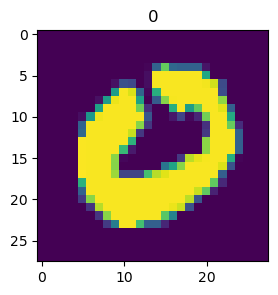

In [22]:
#图像测试
img2 = x_test[25]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[25])
plt.show()

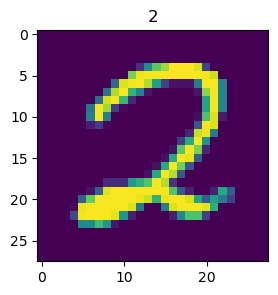

In [24]:
img3 = x_test[35]
fig3 = plt.figure(figsize=(3,3))
plt.imshow(img3)
plt.title(y_test_predict[35])
plt.show()